In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('C:/Users/16693/desktop/data parctice/Machine Learning Project/perrin-freres-monthly-champagne-.csv')

#### Data Cleaning

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.columns = ['Month','Sales']
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
df.drop(106,axis = 0,inplace=True)

In [7]:
df.drop(105,axis = 0, inplace=True)

In [8]:
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df.set_index('Month',inplace=True)

In [10]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


##### Data Visualization

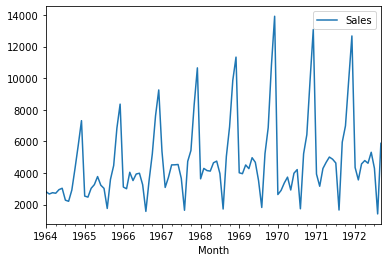

In [11]:
df.plot()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result = adfuller(df['Sales'])

In [14]:
test_result

(-1.8335930563276204,
 0.3639157716602462,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [15]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels=['ADF Test Sstatistic','p-value','#Lag Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label + ':'+str(value))
    if result[1]<=0.05:
        print('strong evidence against the null hypothesis(H0),reject the null hypothesis,data has stationary')
    else: 
        print('weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary')

In [16]:
adfuller_test(df['Sales'])

ADF Test Sstatistic:-1.8335930563276204
p-value:0.3639157716602462
#Lag Used:11
Number of Observations Used:93
weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary


##### Seasonal Difference

In [17]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [18]:
# Since it is seasonal data
df['First Difference']= df['Sales']-df['Sales'].shift(1)

In [19]:
df['Seasonal First Difference'] = df['Sales']-df['Sales'].shift(12)

In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Sstatistic:-7.626619157213163
p-value:2.060579696813685e-11
#Lag Used:0
Number of Observations Used:92
strong evidence against the null hypothesis(H0),reject the null hypothesis,data has stationary


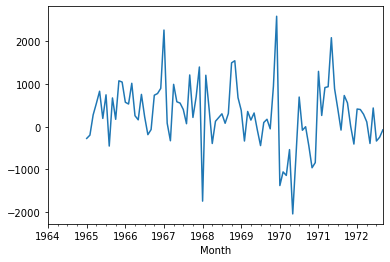

In [21]:
df['Seasonal First Difference'].plot()
plt.show()

##### Final Thoughts on Autocorrelation and Partial Autocorrelation
p-AR model lags
d-differencing
q-MA lags

In [22]:
import statsmodels
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

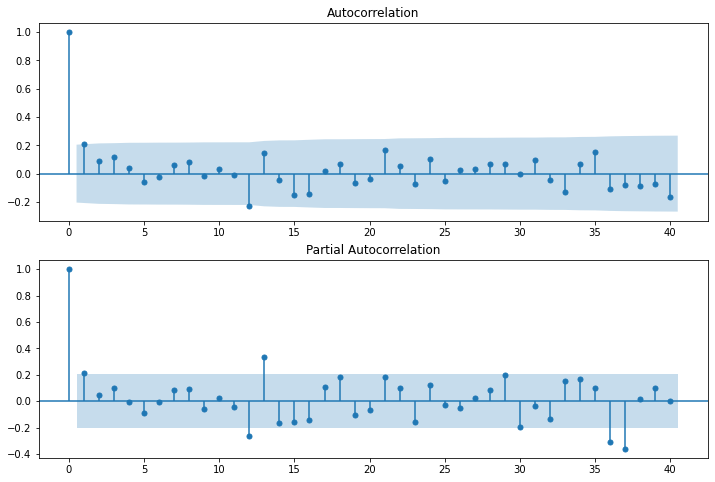

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax2)

In [24]:
# For non-seasonal data
# p=1 d = 1 q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model = ARIMA(df['Sales'],order=(1,1,1))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 26 Aug 2023   AIC                           1910.251
Time:                        16:45:35   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7851     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
df.shape

(105, 3)

<AxesSubplot:xlabel='Month'>

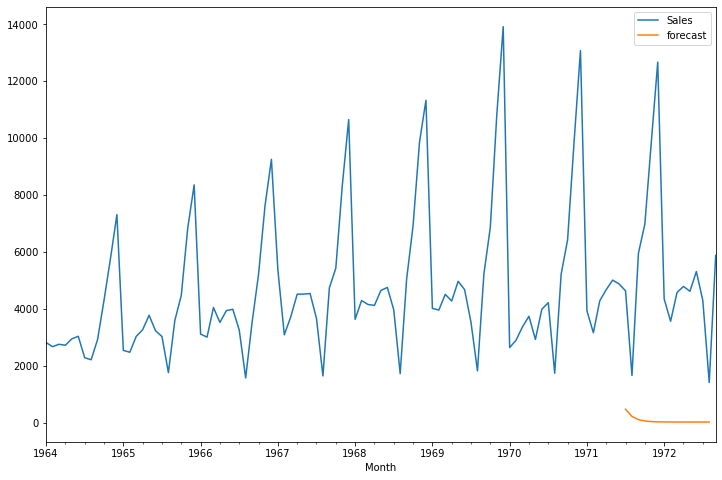

In [28]:
df['forecast'] = model_fit.predict(start = 90,end = 103,dynamic = True)
df[['Sales','forecast']].plot(figsize = (12,8))

#### For seasonal order model

In [29]:
import statsmodels.api as sm

In [30]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order = (1,1,1),seasonal_order = (1,1,1,12))
results2 = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [31]:
df['forecast2'] = results2.predict(start = 90,end = 103, dynamic = True)

<AxesSubplot:xlabel='Month'>

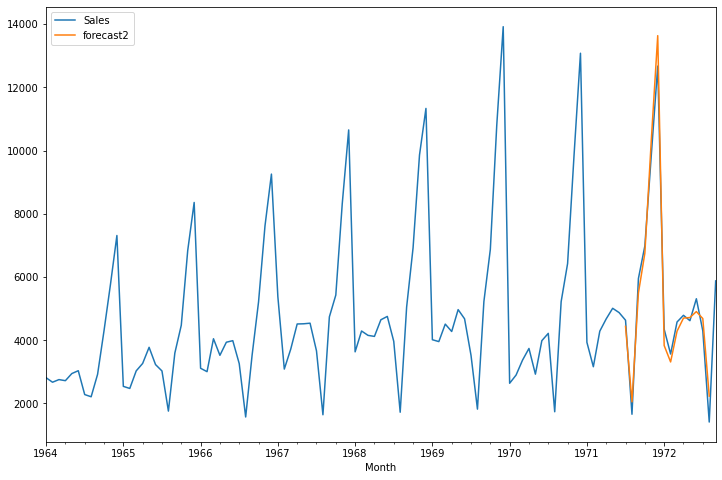

In [32]:
df[['Sales','forecast2']].plot(figsize = (12,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates  = [df.index[-1]+DateOffset(months = x)for x in range(0,24)]

In [34]:
future_datesets_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [35]:
future_df = pd.concat([df,future_datesets_df])

<AxesSubplot:>

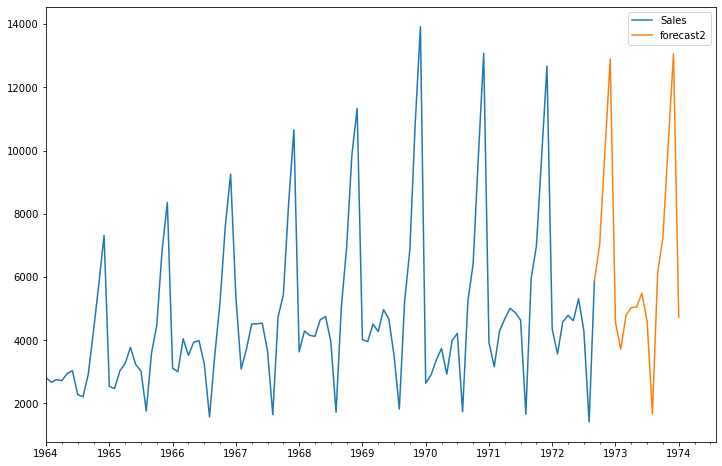

In [42]:
future_df['forecast2'] = results2.predict(start = 104, end = 120, dynamic = True)
future_df['forecast'] = model_fit.predict(start = 104, end = 120, dynamic = True)
future_df[['Sales','forecast2']].plot(figsize = (12,8))

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 26 Aug 2023   AIC                           1910.251
Time:                        16:47:34   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7851     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [44]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sat, 26 Aug 2023   AIC                           1486.804
Time:                                    16:47:48   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""